In [1]:
%load_ext autoreload
%autoreload 2

# Examining ChiX

We know from the [bpRNA-1m](https://bprna.cgrb.oregonstate.edu/index.html) dataset that there are a lot of different motifs in natural RNAs. The table below shows the number of occurences of each structural motif in the database and highlights how much more common some are compared to others. One thing to note is the abundance of pseudoknots, which are structurally more complex features compared to other motifs and are not predicted by design by many structure-prediction algorithms. In this notebook we will nonetheless examine ChiX and its mutants for such motifs.

In [2]:
bpRNA_motifs = {'Hairpins': 708144,
                'Bulges': 517672,
                'Multi Loops': 317046,
                'Internal Loops': 538670,
                'Pseudoknots': 57686,
                'Stems': 2075928,
                'Unpaired Regions': 229468,
                'Segments': 1019586}

for k, v in bpRNA_motifs.items():
    print(f'% {k}:\t', v / sum(bpRNA_motifs.values()))

% Hairpins:	 0.12959701328648293
% Bulges:	 0.09473884557666264
% Multi Loops:	 0.05802240035137806
% Internal Loops:	 0.09858167709820284
% Pseudoknots:	 0.010557080633944584
% Stems:	 0.3799143515976721
% Unpaired Regions:	 0.041994802532850185
% Segments:	 0.18659382892280663


## Imports

In [3]:
import os
from subprocess import Popen, PIPE

import ViennaRNA
from varnaapi import Structure
from synbio_morpher.utils.data.data_format_tools.manipulate_fasta import load_seq_from_FASTA
from synbio_morpher.srv.io.manage.script_manager import script_preamble
from synbio_morpher.srv.parameter_prediction.simulator import process_raw_stdout
from synbio_morpher.utils.common.setup import prepare_config, expand_config
from synbio_morpher.utils.data.data_format_tools.common import load_json_as_dict
from synbio_morpher.utils.misc.type_handling import flatten_listlike
from run_bpRNA import write_dbn, execute_perl_script, aggregate_motifs

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
fn = os.path.join('..', 'data', 'sRNA', 'merged_inter.csv')
fn_merged = os.path.join('..', 'data', 'sRNA', 'merged_EcoCyc_RNAInter_sRNATarBase.csv')
data = pd.read_csv(fn)
data_merged = pd.read_csv(fn_merged)

try:
    data = data.drop(columns='Unnamed: 0')
    data_merged = data_merged.drop(columns='Unnamed: 0')
except:
    pass

In [5]:
def show_rna_structure(rna_structure, seq, resolution = 3, algorithm = 'radiate', annotate: bool = False):
    try:
        v = Structure(structure=rna_structure, sequence=seq)
        v._params['resolution'] = resolution
        v._params['algorithm'] = algorithm
        if annotate:
            v._params['autoHelices'] = True
            v._params['autoInteriorLoops'] = True
            v._params['autoTerminalLoops'] = True
        v.show()
        # v.savefig("example.png", show=True)
    except FileNotFoundError:
        print('No Java found, could not visualise')
        pass

    

In [6]:
chix = data[(data['Interactor 1'] == 'chiX') | (data['Interactor 2'] == 'chiX')]

['java', '-cp', './VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', 'ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTCCTCTTTGACGGGCCAATAGCGATATTGGCCATTTTTTT', '-structureDBN', '...((((((((...)))))))).........(((((((((.....((........))(((((((....))))))))))))))))', '-o', '/tmp/tmpt44j_we9.png', '-resolution', '3']


Output file: /tmp/tmpt44j_we9.png



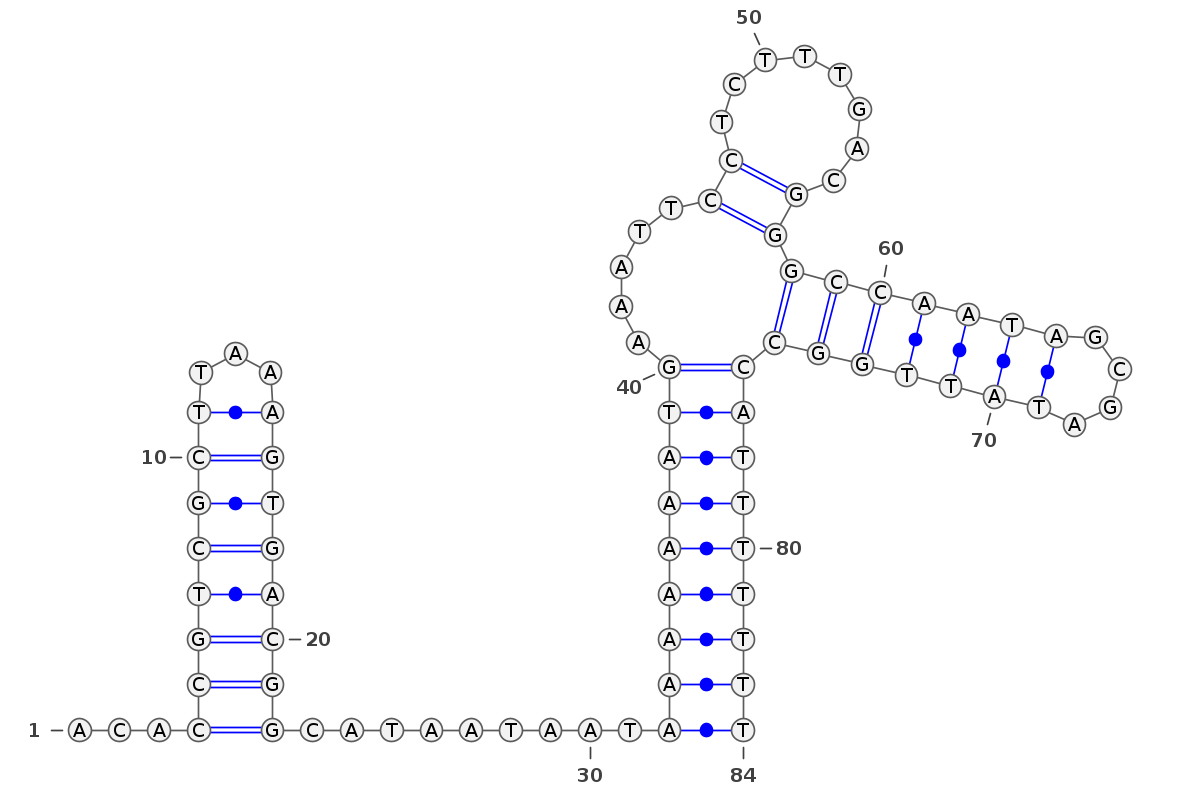

In [7]:
s = ''
# ChiX
seq = chix['Sequence 1'].iloc[0] if chix['Interactor 1'].iloc[0] == 'chiX' else chix['Sequence 2'].iloc[0]
folded = ViennaRNA.fold(seq, s)
folded

show_rna_structure(folded[0], seq)

# Scott's mutations

In [8]:
fn_mutations = os.path.join('data', 'scott_mutations.fasta')

muts = load_seq_from_FASTA(fn_mutations, as_type='dict')


In [9]:
print('Synthetic sequence \t', muts['Syn_ChiX_20-D'])
print('Normal sequence \t', chix['Sequence 1'].iloc[0] if chix['Interactor 1'].iloc[0] == 'chiX' else chix['Sequence 2'].iloc[0])

Synthetic sequence 	 ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTCTTCTCCTTTACGCATATGGCCAATAGCGATATTGGCCATTTTTTT
Normal sequence 	 ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTCCTCTTTGACGGGCCAATAGCGATATTGGCCATTTTTTT


['java', '-cp', './VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', 'ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTCTTCTCCTTTACGCATATGGCCAATAGCGATATTGGCCATTTTTTT', '-structureDBN', '...((((((((...)))))))).......................................((((((((((....))))))))))......', '-o', '/tmp/tmplym5alg9.png', '-resolution', '3']


Output file: /tmp/tmplym5alg9.png



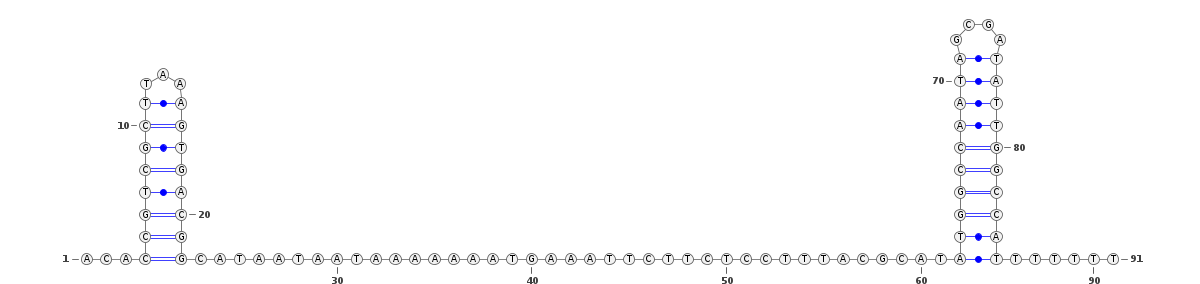

In [10]:
s = ''
# Synthetic ChiX
seq = muts['Syn_ChiX_20-D']
folded = ViennaRNA.fold(seq, s)
folded

show_rna_structure(folded[0], seq)

# v.savefig("example.png", show=True)

In [11]:
chix

,Interactor 1,Interactor 2,ID 1,ID 2,Category 1,Category 2,Regulation,Binding position 1,Binding position 2,Sequence 1,Sequence 2,Source DB
279,chiX,rpoS,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:947210",NaN,mRNA,No Interaction,['NA'],['NA'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGAGTCAGAATACGCTGAAAGTTCATGATTTAAATGAAGATGCGG...,sRNATarBase
353,chiX,citA,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:945233",trans-encoded antisense RNA,mRNA,Repression,['46..57'],['-37..-26'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGTTGCAGCTTAACGAGAATAAACAGTTTGCATTTTTCCAAAGAC...,sRNATarBase
374,chiX,chiP,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:945296",trans-encoded antisense RNA,mRNA,Repression,['81..92'],['45..56'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGCGTACGTTTAGTGGCAAACGTAGTACGCTGGCGCTGGCTATCG...,sRNATarBase
408,chiX,chbC,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:945982",trans-encoded antisense RNA,mRNA,Repression,['NA'],['NA'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGAGTAATGTTATTGCATCGCTTGAAAAGGTACTCCTCCCTTTTG...,sRNATarBase


## Add EGFP and cyRFP1 to targets

The sequence for EGFP can be found via the [Fluorescent Protein Database](https://www.fpbase.org/protein/egfp/) and is the following:

MVSKGEELFT GVVPILVELD GDVNGHKFSV SGEGEGDATY GKLTLKFICT TGKLPVPWPT LVTTLTYGVQ CFSRYPDHMK QHDFFKSAMP EGYVQERTIF FKDDGNYKTR AEVKFEGDTL VNRIELKGID FKEDGNILGH KLEYNYNSHN VYIMADKQKN GIKVNFKIRH NIEDGSVQLA DHYQQNTPIG DGPVLLPDNH YLSTQSALSK DPNEKRDHMV LLEFVTAAGI TLGMDELYK

The source DNA for EGFP can be found on [Addgene](https://www.addgene.org/54762/):

ATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAGCTGGACGGCGACGTAAACGGCCACAAGTTCAGCGTGTCCGGCGAGGGCGAGGGCGATGCCACCTACGGC
AAGCTGACCCTGAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGACCTACGGCGTGCAGTGCTTCAGCCGCTACCCCGACCACATGAAGCAGCAC
GACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGCGCACCATCTTCTTCAAGGACGACGGCAACTACAAGACCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTGGTGAACCGC
ATCGAGCTGAAGGGCATCGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTACAACAGCCACAACGTCTATATCATGGCCGACAAGCAGAAGAACGGCATCAAGGTG
AACTTCAAGATCCGCCACAACATCGAGGACGGCAGCGTGCAGCTCGCCGACCACTACCAGCAGAACACCCCCATCGGCGACGGCCCCGTGCTGCTGCCCGACAACCACTACCTGAGCACCCAG
TCCGCCCTGAGCAAAGACCCCAACGAGAAGCGCGATCACATGGTCCTGCTGGAGTTCGTGACCGCCGCCGGGATCACTCTCGGCATGGACGAGCTGTACAAGTAA


The source for cyRFP1 can also be found on [Addgene](https://www.addgene.org/84356/):

ATGGTGAGCAAGGGCGAGGAGCTGATCAAGGAGAACATGAGAAGCAAGCTGTACCTGGAAGGCAGCGTGAACGGCCACCAGTTCAAGTGCACCCACGAAGGGGAGGGCAAGCCCTACGAGGGC
AAGCAGACCAACAGGATCAAGGTGGTGGAGGGAGGCCCCCTGCCGTTCGCATTCGACATCCTGGCCACCATGTTTATGTACGGGAGCAAGGTGTTCATCAAGTACCCCGCCGACCTCCCCGAT
TATTTTAAGCAGTCCTTCCCTGAGGGCTTCACATGGGAGAGAGTCATGGTGTTCGAAGACGGGGGCGTGCTGACCGCCACCCAGGACACCAGCCTCCAGGACGGCGAGCTCATCTACAACGTC
AAGCTCAGAGGGGTGAACTTCCCAGCCAACGGCCCCGTGATGCAGAAGAAAACACTGGGCTGGGAGCCCAGCACCGAGACCATGTACCCCGCTGACGGCGGCCTGGAAGGCAGATGCGACAAG
GCCCTGAAGCTCGTGGGCGGGGGCCACCTGCACGTCAACTTCAAGACCACATACAAGTCCAAGAAACCCGTGAAGATGCCCGGCGTCCACTACGTGGACCGCAGACTGGAAAGAATCAAGGAG
GCCGACAACGAGACCTACGTCGAGCAGTACGAGCACGCTGTGGCCAGATACTCCAACCTGGGCGGAGGCATGGACGAGCTGTACAA

In [12]:
egfp_seq = 'ATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAGCTGGACGGCGACGTAAACGGCCACAAGTTCAGCGTGTCCGGCGAGGGCGAGGGCGATGCCACCTACGGCAAGCTGACCCTGAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGACCTACGGCGTGCAGTGCTTCAGCCGCTACCCCGACCACATGAAGCAGCACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGCGCACCATCTTCTTCAAGGACGACGGCAACTACAAGACCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTGGTGAACCGCATCGAGCTGAAGGGCATCGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTACAACAGCCACAACGTCTATATCATGGCCGACAAGCAGAAGAACGGCATCAAGGTGAACTTCAAGATCCGCCACAACATCGAGGACGGCAGCGTGCAGCTCGCCGACCACTACCAGCAGAACACCCCCATCGGCGACGGCCCCGTGCTGCTGCCCGACAACCACTACCTGAGCACCCAGTCCGCCCTGAGCAAAGACCCCAACGAGAAGCGCGATCACATGGTCCTGCTGGAGTTCGTGACCGCCGCCGGGATCACTCTCGGCATGGACGAGCTGTACAAGTAA'
cyrfp1_seq = 'ATGGTGAGCAAGGGCGAGGAGCTGATCAAGGAGAACATGAGAAGCAAGCTGTACCTGGAAGGCAGCGTGAACGGCCACCAGTTCAAGTGCACCCACGAAGGGGAGGGCAAGCCCTACGAGGGCAAGCAGACCAACAGGATCAAGGTGGTGGAGGGAGGCCCCCTGCCGTTCGCATTCGACATCCTGGCCACCATGTTTATGTACGGGAGCAAGGTGTTCATCAAGTACCCCGCCGACCTCCCCGATTATTTTAAGCAGTCCTTCCCTGAGGGCTTCACATGGGAGAGAGTCATGGTGTTCGAAGACGGGGGCGTGCTGACCGCCACCCAGGACACCAGCCTCCAGGACGGCGAGCTCATCTACAACGTCAAGCTCAGAGGGGTGAACTTCCCAGCCAACGGCCCCGTGATGCAGAAGAAAACACTGGGCTGGGAGCCCAGCACCGAGACCATGTACCCCGCTGACGGCGGCCTGGAAGGCAGATGCGACAAGGCCCTGAAGCTCGTGGGCGGGGGCCACCTGCACGTCAACTTCAAGACCACATACAAGTCCAAGAAACCCGTGAAGATGCCCGGCGTCCACTACGTGGACCGCAGACTGGAAAGAATCAAGGAGGCCGACAACGAGACCTACGTCGAGCAGTACGAGCACGCTGTGGCCAGATACTCCAACCTGGGCGGAGGCATGGACGAGCTGTACAA'

egfp = chix.iloc[-1][['Interactor 1', 'ID 1', 'Category 1', 'Binding position 1', 'Sequence 1']].to_dict()
for k, v in zip(['Interactor 2', 'ID 2', 'Category 2', 'Regulation', 'Binding position 2', 'Sequence 2', 'Source DB'], ['EGFP', 'https://www.addgene.org/54762/', 'mRNA', 'Repression', "['NA']", egfp_seq, 'Addgene']):
    egfp[k] = [v]
cyrfp1 = chix.iloc[-1][['Interactor 1', 'ID 1', 'Category 1', 'Binding position 1', 'Sequence 1']].to_dict()
for k, v in zip(['Interactor 2', 'ID 2', 'Category 2', 'Regulation', 'Binding position 2', 'Sequence 2', 'Source DB'], ['cyRFP1', 'https://www.addgene.org/84356/', 'mRNA', 'Activator', "['NA']", cyrfp1_seq, 'Addgene']):
    cyrfp1[k] = [v]
    
data = pd.concat([data, pd.DataFrame.from_dict(egfp)])
data = pd.concat([data, pd.DataFrame.from_dict(cyrfp1)])

chix = data[(data['Interactor 1'] == 'chiX') | (data['Interactor 2'] == 'chiX')]
chix


,Interactor 1,Interactor 2,ID 1,ID 2,Category 1,Category 2,Regulation,Binding position 1,Binding position 2,Sequence 1,Sequence 2,Source DB
279,chiX,rpoS,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:947210",NaN,mRNA,No Interaction,['NA'],['NA'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGAGTCAGAATACGCTGAAAGTTCATGATTTAAATGAAGATGCGG...,sRNATarBase
353,chiX,citA,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:945233",trans-encoded antisense RNA,mRNA,Repression,['46..57'],['-37..-26'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGTTGCAGCTTAACGAGAATAAACAGTTTGCATTTTTCCAAAGAC...,sRNATarBase
374,chiX,chiP,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:945296",trans-encoded antisense RNA,mRNA,Repression,['81..92'],['45..56'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGCGTACGTTTAGTGGCAAACGTAGTACGCTGGCGCTGGCTATCG...,sRNATarBase
408,chiX,chbC,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:945982",trans-encoded antisense RNA,mRNA,Repression,['NA'],['NA'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGAGTAATGTTATTGCATCGCTTGAAAAGGTACTCCTCCCTTTTG...,sRNATarBase
0,chiX,EGFP,"chromosome:NC_000913.3, Gene ID:5061500",https://www.addgene.org/54762/,trans-encoded antisense RNA,mRNA,Repression,['NA'],['NA'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCC...,Addgene
0,chiX,cyRFP1,"chromosome:NC_000913.3, Gene ID:5061500",https://www.addgene.org/84356/,trans-encoded antisense RNA,mRNA,Activator,['NA'],['NA'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGGTGAGCAAGGGCGAGGAGCTGATCAAGGAGAACATGAGAAGCA...,Addgene


['java', '-cp', './VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', 'ATGGTGAGCAAGGGCGAGGAGCTGATCAAGGAGAACATGAGAAGCAAGCTGTACCTGGAAGGCAGCGTGAACGGCCACCAGTTCAAGTGCACCCACGAAGGGGAGGGCAAGCCCTACGAGGGCAAGCAGACCAACAGGATCAAGGTGGTGGAGGGAGGCCCCCTGCCGTTCGCATTCGACATCCTGGCCACCATGTTTATGTACGGGAGCAAGGTGTTCATCAAGTACCCCGCCGACCTCCCCGATTATTTTAAGCAGTCCTTCCCTGAGGGCTTCACATGGGAGAGAGTCATGGTGTTCGAAGACGGGGGCGTGCTGACCGCCACCCAGGACACCAGCCTCCAGGACGGCGAGCTCATCTACAACGTCAAGCTCAGAGGGGTGAACTTCCCAGCCAACGGCCCCGTGATGCAGAAGAAAACACTGGGCTGGGAGCCCAGCACCGAGACCATGTACCCCGCTGACGGCGGCCTGGAAGGCAGATGCGACAAGGCCCTGAAGCTCGTGGGCGGGGGCCACCTGCACGTCAACTTCAAGACCACATACAAGTCCAAGAAACCCGTGAAGATGCCCGGCGTCCACTACGTGGACCGCAGACTGGAAAGAATCAAGGAGGCCGACAACGAGACCTACGTCGAGCAGTACGAGCACGCTGTGGCCAGATACTCCAACCTGGGCGGAGGCATGGACGAGCTGTACAA', '-structureDBN', '............(((((((.(((..(((.(.....).)))..)))..(((((.((((((.(((.((((((((........)))))..))).(((.....)))....((..(((((...)))))..)).((((....)).))..((((((((.((.(.(((((((((.....)))(((((((

Output file: /tmp/tmprhzj2k1d.png



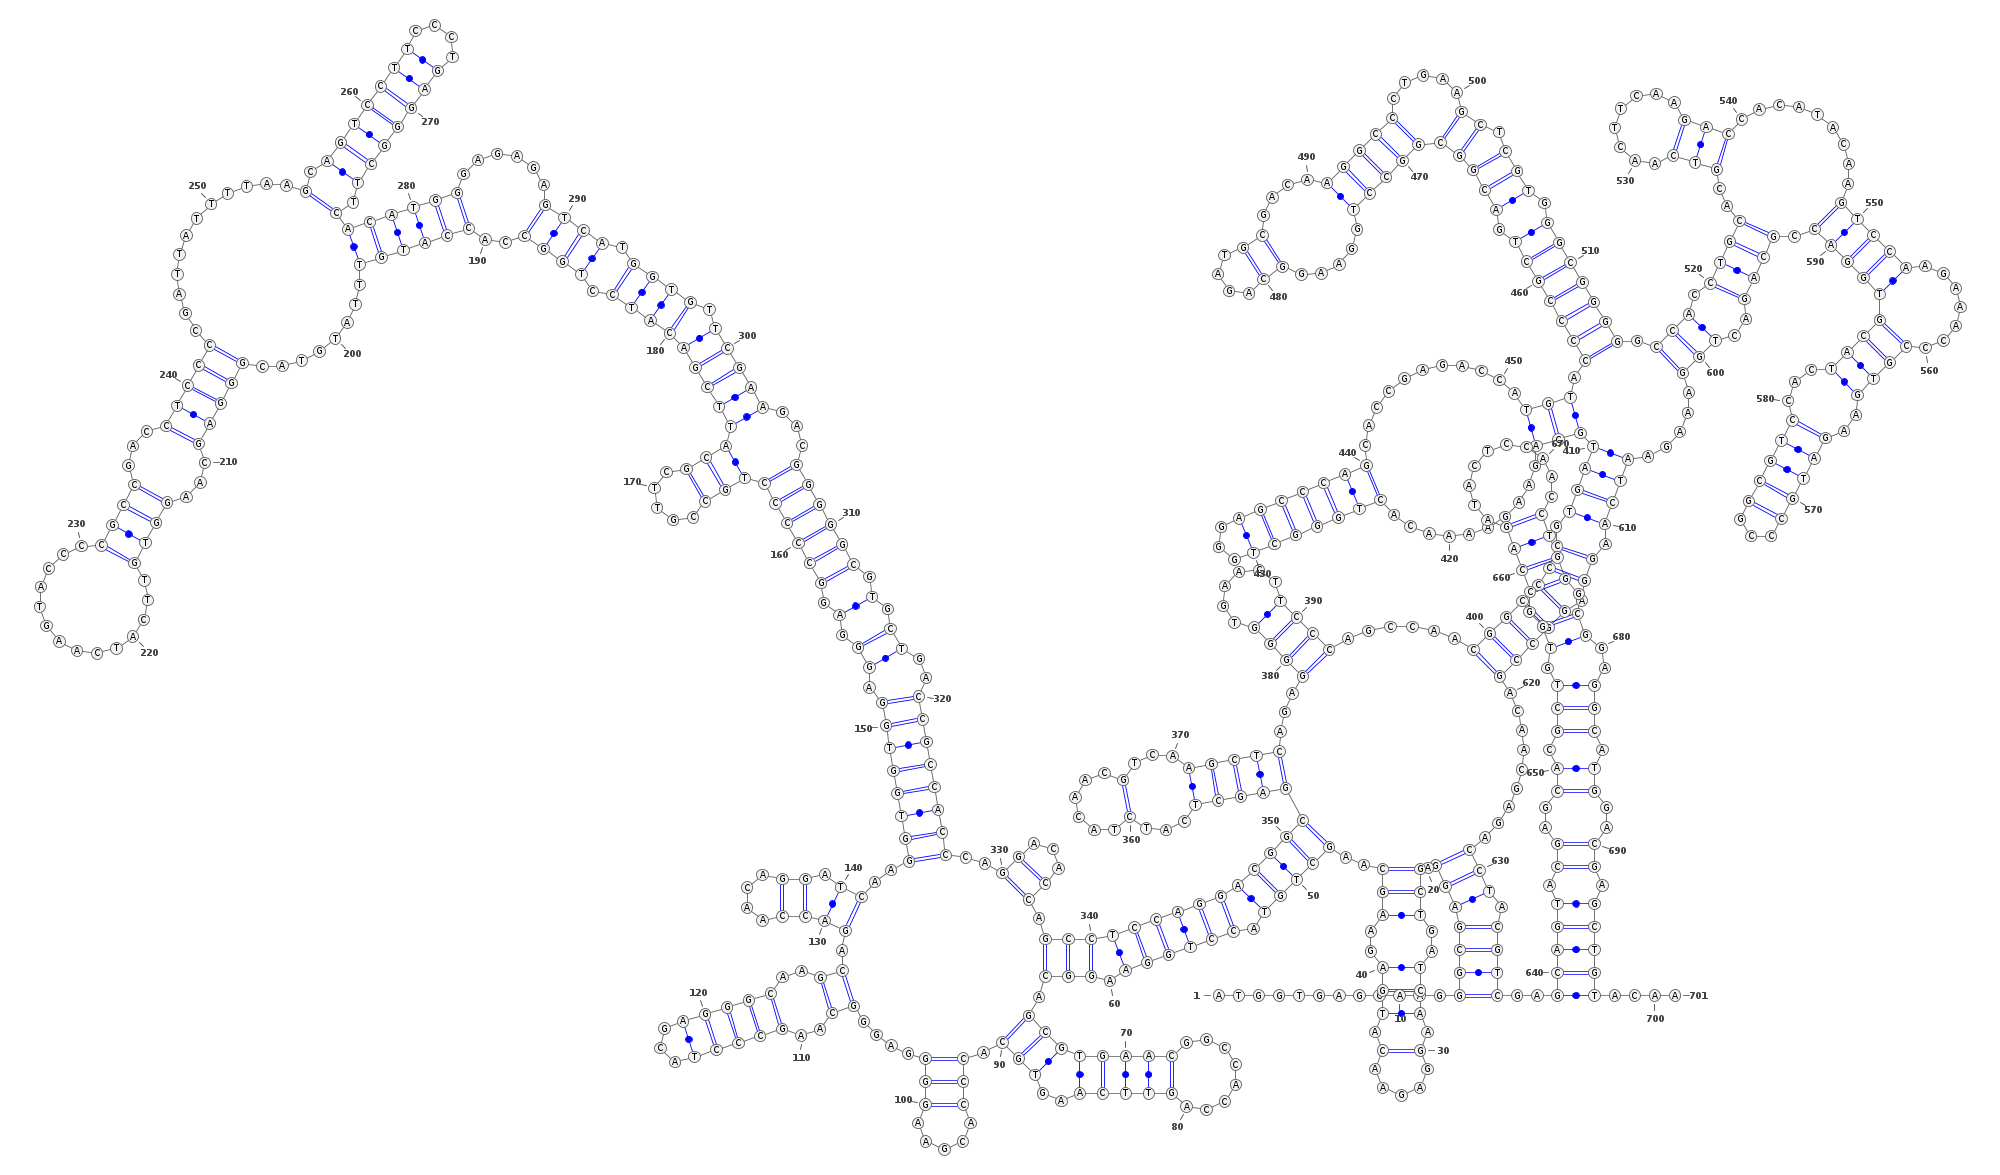

In [13]:
show_rna_structure(ViennaRNA.fold(cyrfp1_seq)[0], cyrfp1_seq, resolution=5)

['java', '-cp', './VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', 'ATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAGCTGGACGGCGACGTAAACGGCCACAAGTTCAGCGTGTCCGGCGAGGGCGAGGGCGATGCCACCTACGGCAAGCTGACCCTGAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGACCTACGGCGTGCAGTGCTTCAGCCGCTACCCCGACCACATGAAGCAGCACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGCGCACCATCTTCTTCAAGGACGACGGCAACTACAAGACCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTGGTGAACCGCATCGAGCTGAAGGGCATCGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTACAACAGCCACAACGTCTATATCATGGCCGACAAGCAGAAGAACGGCATCAAGGTGAACTTCAAGATCCGCCACAACATCGAGGACGGCAGCGTGCAGCTCGCCGACCACTACCAGCAGAACACCCCCATCGGCGACGGCCCCGTGCTGCTGCCCGACAACCACTACCTGAGCACCCAGTCCGCCCTGAGCAAAGACCCCAACGAGAAGCGCGATCACATGGTCCTGCTGGAGTTCGTGACCGCCGCCGGGATCACTCTCGGCATGGACGAGCTGTACAAGTAA', '-structureDBN', '..((((((((...((.....))))))))))(((((..(((((.((((((.((.((((((((((..........)))....))))))).)).)))).)))))))((((((.((((......)))).((.((.(.((((((((((((......(((.....(((

Output file: /tmp/tmpznkuf6_h.png



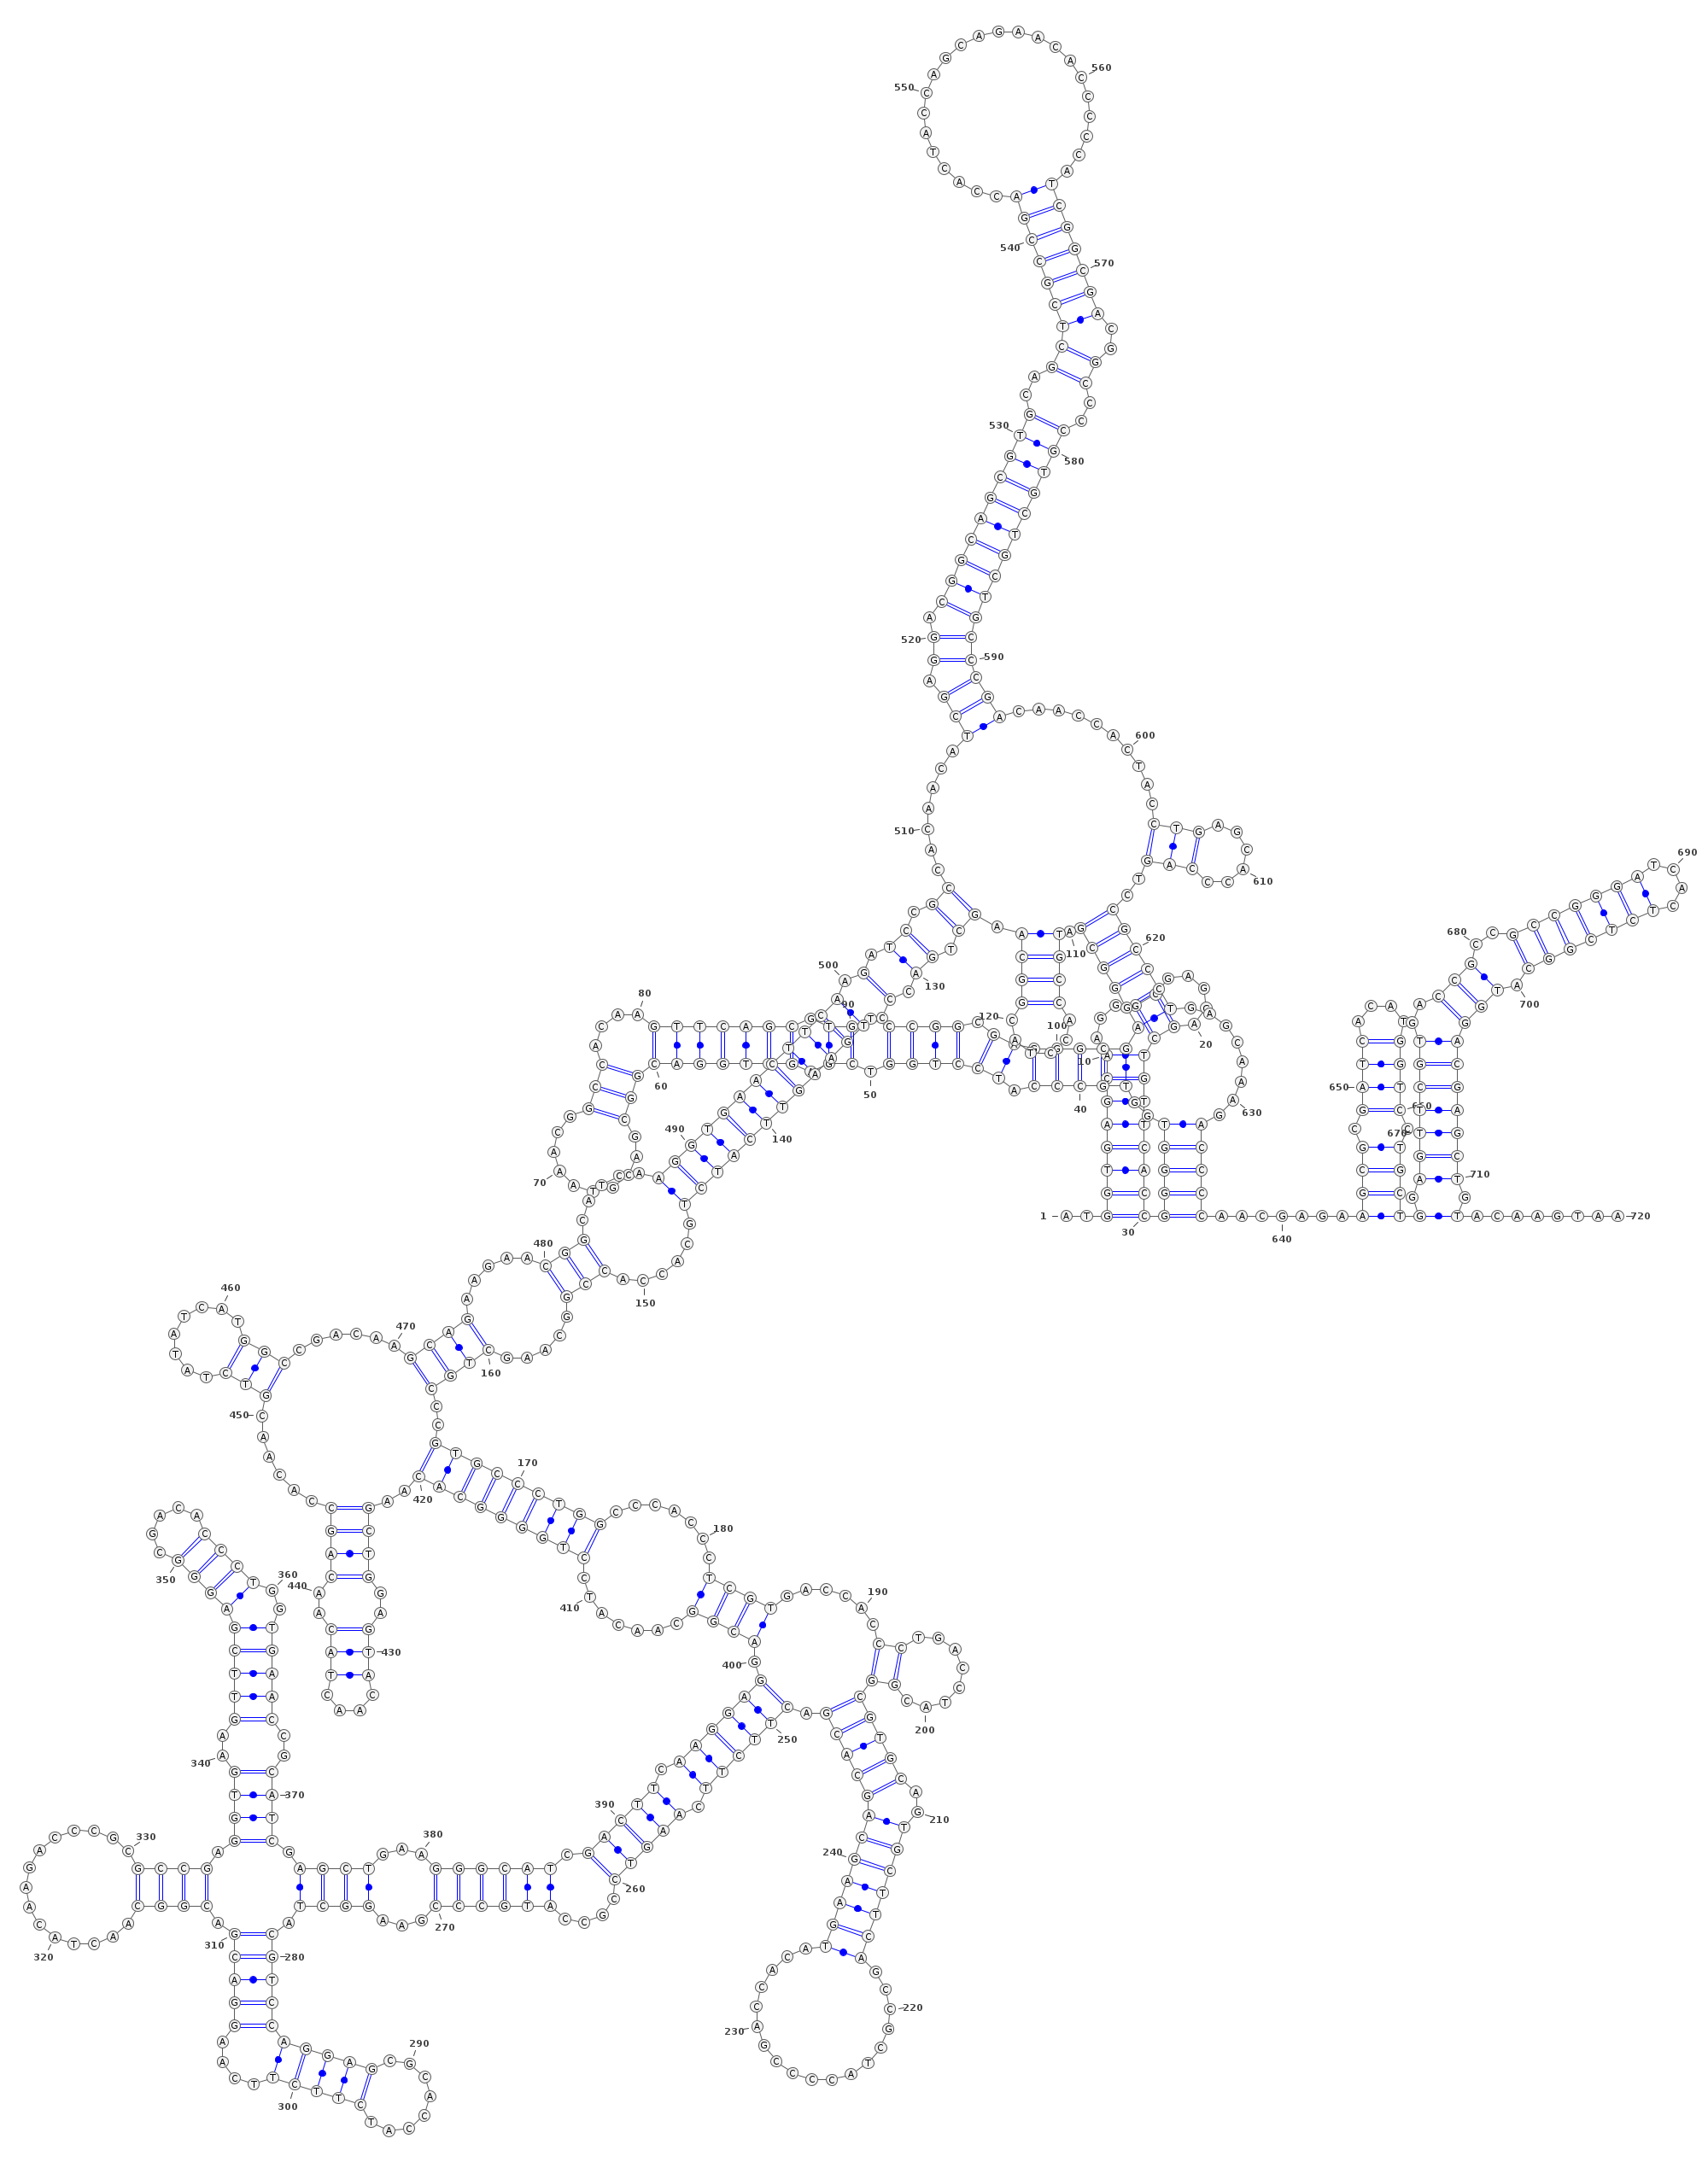

In [14]:
show_rna_structure(ViennaRNA.fold(egfp_seq)[0], egfp_seq, resolution=5)

# Analyse synthetic chiX binding to all targets

In [15]:
s = 'syn_chiX'
mrnas = {m['Interactor 2']: m['Sequence 2']
         for _, m in data[['Interactor 2', 'Sequence 2']].iterrows() if type(m['Sequence 2']) == str}

len(mrnas)

283

### Run IntaRNA

In [16]:
config = {
    "experiment": {
        "purpose": "tests",
    },
    "data": {},
    "system_type": "RNA",
    "interaction_simulator": {
        "name": "IntaRNA",
        "postprocess": True,
        "simulator_kwargs": {
            "outcsvcols": "id1, id2, E, E_norm, bpList, hybridDPfull, seedPu1, seedPu2, seedStart1, seedStart2, seedEnd1, seedEnd2",
            "threads": 12,
            "n": 1,
            "raw_stdout": True
        }
    },
    "molecular_params": {
        "avg_mRNA_per_cell": 100,
        "cell_doubling_time": 1200,
        "creation_rate": 2.35,
        "starting_copynumbers": 200,
        "degradation_rate": 0.01175,
        "association_binding_rate": 1000000
    }
}


run_intarna = False


if run_intarna:
    data_writer = None
    config, data_writer = script_preamble(config, data_writer)
    config = prepare_config(expand_config(config=config))

In [17]:
config['interaction_simulator']['simulator_kwargs']['outcsvcols'] = "id1, id2, E, E_norm, bpList, hybridDPfull, seedPu1, seedPu2, seedStart1, seedStart2, seedEnd1, seedEnd2"

In [18]:
def simulate_IntaRNA_local(query: dict,
                           targets: dict,
                           sim_kwargs={}):
    fn1 = data_writer.output(data=query, out_type='fasta',
                             out_name='query', byseq=True, return_path=True)
    fn2 = data_writer.output(data=targets, out_type='fasta',
                             out_name='targets', byseq=True, return_path=True)
    sim_kwargs['query'] = fn1
    sim_kwargs['target'] = fn2

    def run(query: str, target: str, qidxpos0: int, tidxpos0: int, outcsvcols: str, threads: int, n: int = 1,
            param_file: str = '', extra_params: list = [], raw_stdout: bool = False):
        p = Popen(['IntaRNA', '-q', query, '-t', target,
                   '--outMode=C', f'--outcsvcols={outcsvcols}',
                   f'--qIdxPos0={qidxpos0}',
                   f'--tIdxPos0={tidxpos0}',
                   f'--outNumber={n}',
                   f'--threads={threads}', param_file]
                  + extra_params, stdout=PIPE, stderr=PIPE, universal_newlines=True)
        stdout, stderr = p.communicate()
        return process_raw_stdout(stdout)

    return run(**sim_kwargs)


if run_intarna:
    sim_data = {}
    for s, sseq in muts.items():
        sim_data[s] = {}
        sim_data[s] = simulate_IntaRNA_local(query={s: sseq},
                                            targets=mrnas,
                                            sim_kwargs=config['interaction_simulator']['simulator_kwargs'])

        data_writer.output(data=sim_data, out_type='json',
                        out_name='inter_data_raw', overwrite=True)
    print(data_writer.write_dir)

### Load back in

In [19]:
fn = './data/tests/2023_12_02_160155/inter_data_raw.json'
sim_data_l = load_json_as_dict(fn)

default_vals = {
    'id1': '', 'id2': '', 'E': 0.0, 'E_norm': 0.0, 'bpList': '', 'hybridDPfull': '', 'seedPu1': '', 'seedPu2': '', 'seedStart1': '', 'seedStart2': '', 'seedEnd1': '', 'seedEnd2': ''
}
for s, v in sim_data_l.items():
    if len(v.values()) < len(mrnas):
        diffs = set(mrnas.keys()) - set(v.keys())
        for d in diffs:
            sim_data_l[s][d] = default_vals
        

In [20]:
sim_data_l.keys()

dict_keys(['Syn_ChiX_20-D', 'MutagenesisVariant_1', 'MutagenesisVariant_2', 'MutagenesisVariant_3', 'MutagenesisVariant_4', 'MutagenesisVariant_5', 'MutagenesisVariant_6', 'MutagenesisVariant_7', 'MutagenesisVariant_8', 'MutagenesisVariant_9', 'MutagenesisVariant_10', 'MutagenesisVariant_11', 'MutagenesisVariant_12', 'MutagenesisVariant_13', 'MutagenesisVariant_14', 'MutagenesisVariant_15', 'MutagenesisVariant_16', 'MutagenesisVariant_17', 'MutagenesisVariant_18', 'MutagenesisVariant_19', 'MutagenesisVariant_20', 'MutagenesisVariant_21', 'MutagenesisVariant_22', 'MutagenesisVariant_23', 'MutagenesisVariant_24', 'MutagenesisVariant_25', 'MutagenesisVariant_26', 'MutagenesisVariant_27', 'MutagenesisVariant_28', 'MutagenesisVariant_29', 'MutagenesisVariant_30', 'MutagenesisVariant_31', 'MutagenesisVariant_32', 'MutagenesisVariant_33', 'MutagenesisVariant_34', 'MutagenesisVariant_35', 'MutagenesisVariant_36', 'MutagenesisVariant_37', 'MutagenesisVariant_38', 'MutagenesisVariant_39', 'Mutag

In [21]:
sim_data_l['MutagenesisVariant_1'].keys()

dict_keys(['hfq', 'fhlA', 'dsrB', 'gloA', 'hns', 'luxS', 'fimB', 'ldtC', 'lpxT', 'galK', 'ompC', 'ompW', 'ompA', 'pal', 'ompT', 'ompF', 'yneM', 'lamB', 'omrA', 'omrB', 'yfeK', 'sodB', 'phoP', 'dppA', 'ygiM', 'ybgF', 'argR', 'rbsD', 'tsx', 'nusG', 'rpoS', 'sdhB', 'ptsG', 'ompR', 'tolC', 'folP', 'fur', 'sdhD', 'yqaE', 'iscS', 'ilvI', 'nadE', 'glmM', 'cirA', 'btuB', 'csrC', 'fepA', 'hokB', 'mokB', 'csrB', 'yejA', 'symE', 'mokC', 'fecA', 'yobF', 'ldrD', 'ftsZ', 'fumA', 'wrbA', 'bfr', 'shiA', 'gadX', 'ftnA', 'fecD', 'glmS', 'sucD', 'acnA', 'sstT', 'gntP', 'sucB', 'mdh', 'rpmG', 'yeaK', 'cycA', 'tolR', 'sucC', 'icd', 'gltA', 'moaD', 'tusD', 'yeaC', 'gfcB', 'dppD', 'tolA', 'gtrB', 'tolB', 'paoA', 'ybjG', 'yadS', 'mnmH', 'sugE', 'fabB', 'pmbA', 'pinH', 'yfgO', 'yccE', 'citG', 'yiaM', 'yagJ', 'motA', 'yecD', 'yegK', 'kdpA', 'hyuA', 'ydaN', 'mqsA', 'gspD', 'ykgE', 'metI', 'gmhB', 'proA', 'lit', 'ynfF', 'deoR', 'nadA', 'ygiQ', 'folA', 'hisM', 'ydbC', 'higB', 'rrrD', 'glcD', 'mipA', 'hokD', 'uup',

### Run bpRNA

In [24]:
# bpRNA

run_bpRNA = False


if run_bpRNA:
    data_writer.top_write_dir = os.path.dirname(fn)
    data_writer.reset_ensemble()
    data_writer.unsubdivide()

    for k1 in sim_data_l:
        data_writer.subdivide_writing('st')
        data_writer.subdivide_writing(k1, safe_dir_change=False)
        data_writer.unsubdivide()
        data_writer.subdivide_writing('dbn')
        data_writer.subdivide_writing(k1, safe_dir_change=False)

        for k2 in sim_data_l[k1]:
            bplist = sim_data_l[k1][k2]['bpList']
            # make_db(bplist, seq_len=len(db))
            db = sim_data_l[k1][k2]['hybridDPfull'].replace('&', '')
            try:
                seq = muts[k1] + \
                    data_merged[data_merged['Symbol'] == k2]['Sequence'].iloc[0]
            except IndexError:
                seq = muts[k1] + \
                    data[data['Interactor 2'] == k2]['Sequence 2'].iloc[0]
            fn = write_dbn(k1 + '_' + k2, data_writer.write_dir, id_name='arcZ', seq=seq, db=db)
            try:
                execute_perl_script(fn, fn.replace('.dbn', '').replace('dbn', 'st'))
            except:
                print(k1, k2)
    data_writer.unsubdivide()
                

In [25]:
motifs = aggregate_motifs(sim_data=sim_data_l, dir_st=os.path.join(os.path.dirname(fn), 'st'))


/home/wadh6511/Kode/EvoScaper/notebooks_sRNA/run_bpRNA.py:54: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  structures = structures.reset_index().drop(columns='index')


In [27]:
motifs

sRNA   Target Mean Length                               \
                                               B      E       H     I  M NCBP   
0             Syn_ChiX_20-D      hfq         0.0   16.5   345.0  0.00  0  1.0   
1             Syn_ChiX_20-D     fhlA         0.0   61.5   188.0  0.00  0  1.0   
2             Syn_ChiX_20-D     dsrB         0.0   28.0   339.0  0.00  0  1.0   
3             Syn_ChiX_20-D      hns         0.0   82.0   324.0  0.00  0  1.0   
4             Syn_ChiX_20-D     fimB         0.0  180.5   307.0  0.00  0  1.0   
...                     ...      ...         ...    ...     ...   ... ..  ...   
7064  MutagenesisVariant_60     cusC         0.0  360.5   717.0  0.00  0  1.0   
7065  MutagenesisVariant_60   cyRFP1         0.0  217.5   324.0  0.00  0  1.0   
7066  MutagenesisVariant_60     mreB         0.0  167.5   783.0  0.00  0  1.0   
7067  MutagenesisVariant_60     fliC         3.0  333.5  1105.0  0.50  0  1.0   
7068  MutagenesisVariant_60  sdhCDAB         0.0  335.5  2582.0  0.75  0  1.0   

              ... Num in seq                                      
     PK PKBP  ...          E  H  I  M NCBP PK PKBP  S  X segment  
0     0    0  ...          2  1  0  0    8  0    0  2  0       1  
1     0    0  ...          2  1  0  0    9  0    0  2  0       1  
2     0    0  ...          2  1  0  0   10  0    0  1  0       1  
3     0    0  ...          2  1  0  0    6  0    0  1  0       1  
4     0    0  ...          2  1  0  0   10  0    0  2  0       1  
...  ..  ...  ...        ... .. .. ..  ... ..  ... .. ..     ...  
7064  0    0  ...          2  1  2  0   11  0    0  2  0       1  
7065  0    0  ...          2  1  4  0    9  0    0  3  0       1  
7066  0    0  ...          2  1  0  0    6  0    0  1  0       1  
7067  0    0  ...          2  1  8  0   25  0    0  6  0       1  
7068  0    0  ...          2  1  8  0   20  0    0  5  0       1  

[7069 rows x 24 columns]

## Visualise mutation differences

In [67]:
df_mutations = pd.DataFrame(flatten_listlike([[
    [k1, k2,
     v['hybridDPfull'].count('('),
     float(v['E']),
     float(sim_data_l['Syn_ChiX_20-D'][k2]['E']) - float(v['E']),
     float(sim_data_l['Syn_ChiX_20-D'][k2]['E_norm']) - float(v['E_norm']),
     float(sim_data_l['Syn_ChiX_20-D'][k2]['E']) / sim_data_l['Syn_ChiX_20-D'][k2]['hybridDPfull'].count(
         '(') - float(v['E']) / v['hybridDPfull'].count('(') if (float(sim_data_l['Syn_ChiX_20-D'][k2]['E']) < 0) & (float(v['E']) < 0) else 0.0,
     motifs[(motifs['sRNA'] == 'Syn_ChiX_20-D') & (motifs['Target'] == k2)]['Mean Length'].reset_index(drop=True) -
     motifs[(motifs['sRNA'] == k1) & (motifs['Target'] == k2)
            ]['Mean Length'].reset_index(drop=True),
     motifs[(motifs['sRNA'] == 'Syn_ChiX_20-D') & (motifs['Target'] == k2)]['Num in seq'].reset_index(drop=True) -
     motifs[(motifs['sRNA'] == k1) & (motifs['Target'] == k2)
            ]['Num in seq'].reset_index(drop=True),
     ] + [*v.values()] for k2, v in sim_data_l[k1].items()] for k1 in sim_data_l]),
    columns=['Interactor 1', 'Interactor 2',
             'Binding site length',
             'E (kcal/mol)',
             'E diff to Syn_ChiX_20-D (kcal/mol)',
             'E norm diff to Syn_ChiX_20-D (kcal/mol)',
             'E diff normalised by binding site length',
             'Mean Length diff',
             'Num in seq diff'] + [*sim_data_l['Syn_ChiX_20-D']['EGFP'].keys()])
# for k1 in sim_data_l:
#     for k2, v in sim_data_l[k1].items():

In [68]:
df_mutations

,Interactor 1,Interactor 2,Binding site length,E (kcal/mol),E diff to Syn_ChiX_20-D (kcal/mol),E norm diff to Syn_ChiX_20-D (kcal/mol),E diff normalised by binding site length,Mean Length diff,Num in seq diff,id1,...,E,E_norm,bpList,hybridDPfull,seedPu1,seedPu2,seedStart1,seedStart2,seedEnd1,seedEnd2
0,Syn_ChiX_20-D,hfq,9,-4.72,0.00,0.000000,0.0,B E H I M NCBP PK PKBP S ...,B E H I M NCBP PK PKBP S X segmen...,hfq,...,-4.72,-0.460748,"(4,59):(5,58):(6,56):(7,55):(8,54):(9,53):(10,...",...(((((((((.....................................,0.0080755106771585074,0.73470881792585185,6,50,12,56
1,Syn_ChiX_20-D,fhlA,12,-8.04,0.00,0.000000,0.0,B E H I M NCBP PK PKBP S ...,B E H I M NCBP PK PKBP S X segmen...,fhlA,...,-8.04,-0.802052,"(95,60):(96,59):(97,58):(98,56):(99,55):(100,5...",.................................................,0.014020168348596316:0.020362178437685265:0.00...,0.47408692630526322:0.48184188016585705:0.7347...,100:99:98,48:49:50,106:105:104,54:55:56
2,Syn_ChiX_20-D,gloA,7,-5.80,0.00,0.000000,0.0,"Empty DataFrame Columns: [B, E, H, I, M, NCBP,...","Empty DataFrame Columns: [B, E, H, I, M, NCBP,...",gloA,...,-5.8,-0.551219,"(233,59):(234,58):(235,57):(236,56):(237,55):(...",.................................................,0.017883466831810114,0.73470881792585185,233,53,239,59
3,Syn_ChiX_20-D,dsrB,12,-5.46,0.00,0.000000,0.0,B E H I M NCBP PK PKBP S ...,B E H I M NCBP PK PKBP S X segmen...,dsrB,...,-5.46,-0.52943,"(13,45):(14,44):(15,43):(16,42):(17,41):(18,40...",............((((((((((((.........................,0.23217159748176816:0.20062728614652683:0.2039...,0.39659365042262729:0.38393050966078013:0.3839...,14:16:17:18:13:15,38:36:35:34:39:37,20:22:23:24:19:21,44:42:41:40:45:43
4,Syn_ChiX_20-D,hns,7,-6.15,0.00,0.000000,0.0,B E H I M NCBP PK PKBP S ...,B E H I M NCBP PK PKBP S X segmen...,hns,...,-6.15,-0.583673,"(126,50):(127,49):(128,48):(129,47):(130,46):(...",.................................................,0.50587619325909472,0.48184188016585705,126,44,132,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17258,MutagenesisVariant_60,shoB,0,0.00,0.00,0.000000,0.0,"Empty DataFrame Columns: [B, E, H, I, M, NCBP,...","Empty DataFrame Columns: [B, E, H, I, M, NCBP,...",,...,0.0,0.0,,,,,,,,
17259,MutagenesisVariant_60,ibsC,0,0.00,0.00,0.000000,0.0,"Empty DataFrame Columns: [B, E, H, I, M, NCBP,...","Empty DataFrame Columns: [B, E, H, I, M, NCBP,...",,...,0.0,0.0,,,,,,,,
17260,MutagenesisVariant_60,omrA,0,0.00,-0.12,-0.013351,0.0,"Empty DataFrame Columns: [B, E, H, I, M, NCBP,...","Empty DataFrame Columns: [B, E, H, I, M, NCBP,...",,...,0.0,0.0,,,,,,,,
17261,MutagenesisVariant_60,omrB,0,0.00,0.00,0.000000,0.0,"Empty DataFrame Columns: [B, E, H, I, M, NCBP,...","Empty DataFrame Columns: [B, E, H, I, M, NCBP,...",,...,0.0,0.0,,,,,,,,


In [89]:
df_mutations['Mean Length diff sum'] = 0 
df_mutations['Num in seq diff sum'] = 0
for i, t in df_mutations.iterrows():
    rr = t['Mean Length diff']
    df_mutations.loc[i, 'Mean Length diff sum'] = np.sum(np.abs(rr.to_numpy()))
    rr = t['Num in seq diff']
    df_mutations.loc[i, 'Num in seq diff sum'] = np.sum(np.abs(rr.to_numpy()))

Text(0.5, 1.0, 'Binding site lengths')

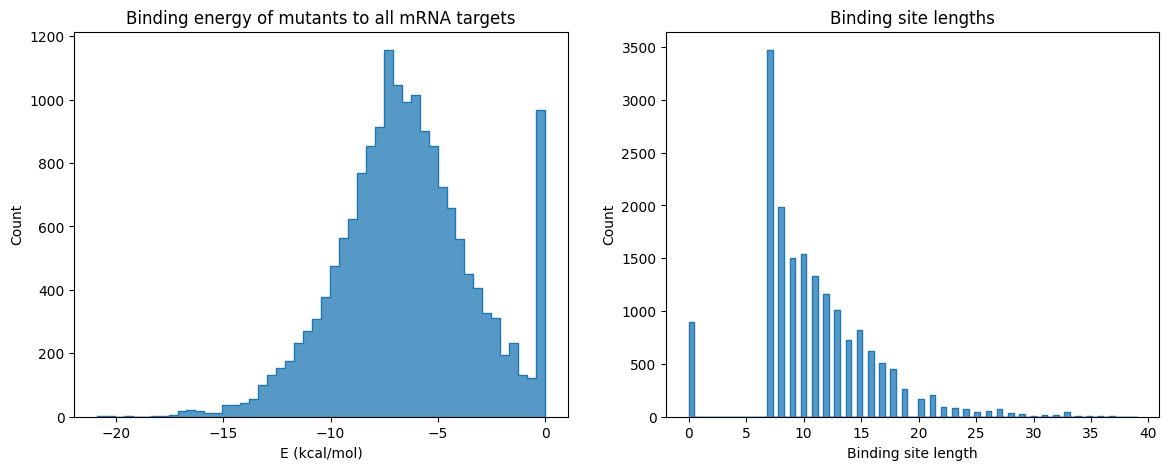

In [39]:
fig = plt.figure(figsize=(14,5))
ax = plt.subplot(1,2,1)
sns.histplot(df_mutations, x='E (kcal/mol)', element='step', bins=50)
plt.title('Binding energy of mutants to all mRNA targets')
ax = plt.subplot(1,2,2)
sns.histplot(df_mutations, x='Binding site length', element='step', bins=80)
plt.title('Binding site lengths')


Text(0.5, 0.98, 'Binding energy to all mRNAs differences between synthetic ChiX and its mutants')

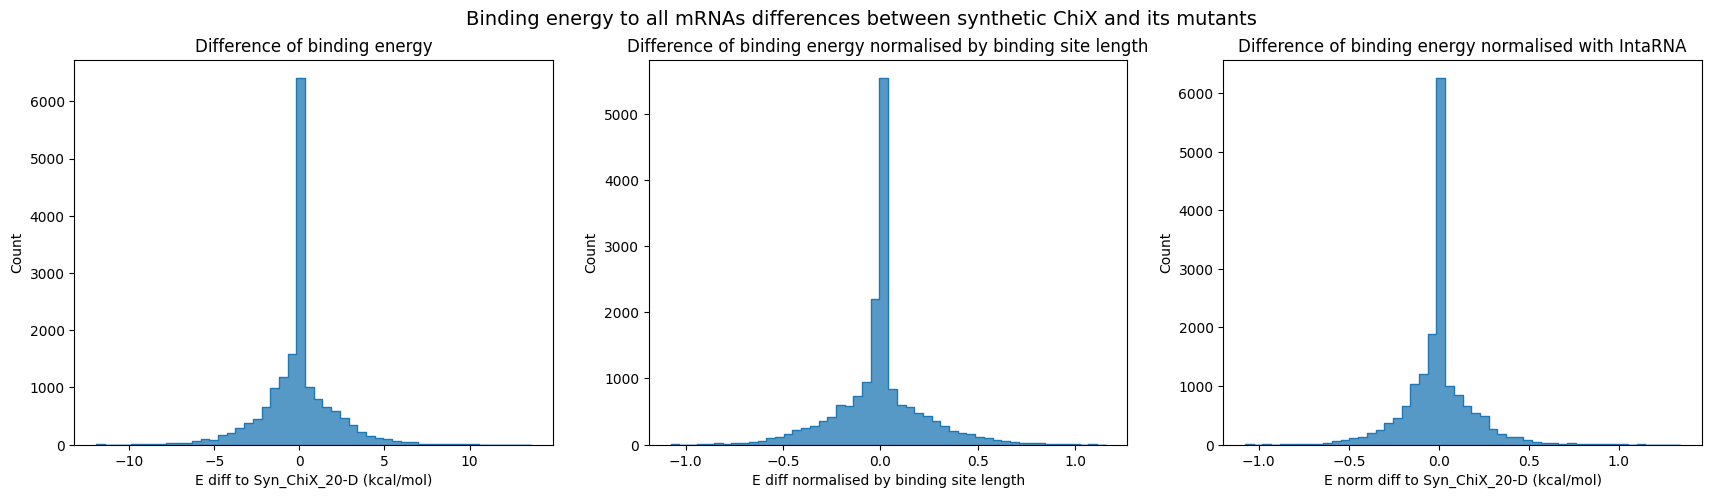

In [40]:
fig = plt.figure(figsize=(21, 5))
ax = plt.subplot(1,3,1)
sns.histplot(df_mutations, x='E diff to Syn_ChiX_20-D (kcal/mol)', element='step', bins=50)
plt.title('Difference of binding energy')
ax = plt.subplot(1,3,2)
sns.histplot(df_mutations, x='E diff normalised by binding site length', element='step', bins=50)
plt.title('Difference of binding energy normalised by binding site length')
ax = plt.subplot(1,3,3)
sns.histplot(df_mutations, x='E norm diff to Syn_ChiX_20-D (kcal/mol)', element='step', bins=50)
plt.title('Difference of binding energy normalised with IntaRNA')

plt.suptitle('Binding energy to all mRNAs differences between synthetic ChiX and its mutants', fontsize=14)

Text(0.5, 0.98, 'Binding energy to official target RNAs differences between synthetic ChiX and its mutants')

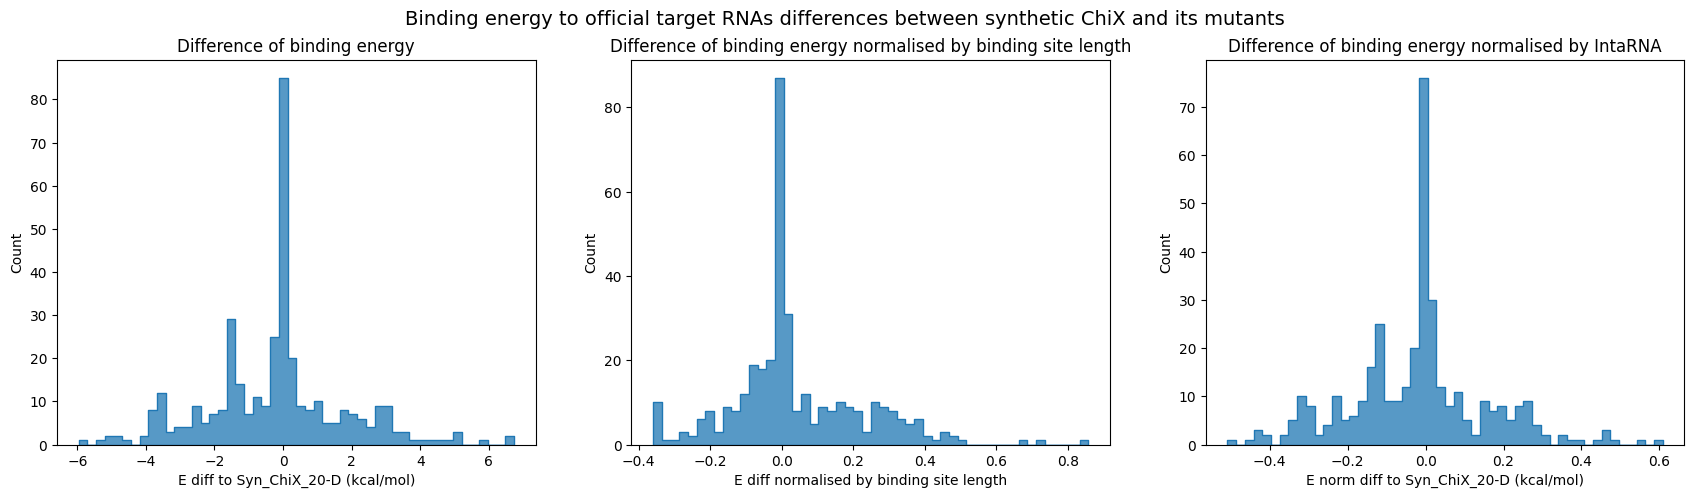

In [41]:
fig = plt.figure(figsize=(21, 5))
ax = plt.subplot(1,3,1)
sns.histplot(df_mutations[df_mutations['Interactor 2'].isin(chix['Interactor 2'].to_list())], x='E diff to Syn_ChiX_20-D (kcal/mol)', element='step', bins=50)
plt.title('Difference of binding energy')
ax = plt.subplot(1,3,2)
sns.histplot(df_mutations[df_mutations['Interactor 2'].isin(chix['Interactor 2'].to_list())], x='E diff normalised by binding site length', element='step', bins=50)
plt.title('Difference of binding energy normalised by binding site length')
ax = plt.subplot(1,3,3)
sns.histplot(df_mutations[df_mutations['Interactor 2'].isin(chix['Interactor 2'].to_list())], x='E norm diff to Syn_ChiX_20-D (kcal/mol)', element='step', bins=50)
plt.title('Difference of binding energy normalised by IntaRNA')

plt.suptitle('Binding energy to official target RNAs differences between synthetic ChiX and its mutants', fontsize=14)

category.py:update():223: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting. INFO
category.py:update():223: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting. INFO


<Axes: xlabel='Num in seq diff sum', ylabel='E diff to Syn_ChiX_20-D (kcal/mol)'>

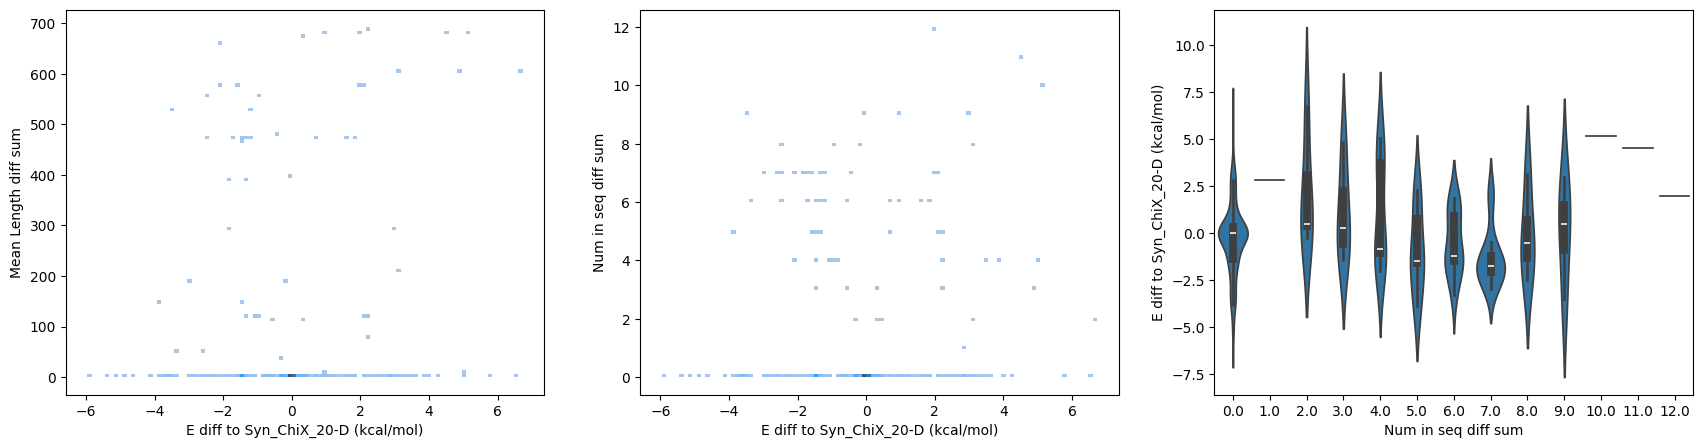

In [194]:
fig = plt.figure(figsize=(21, 5))
ax = plt.subplot(1,3,1)
sns.histplot(df_mutations[df_mutations['Interactor 2'].isin(chix['Interactor 2'].to_list())], x='E diff to Syn_ChiX_20-D (kcal/mol)', y='Mean Length diff sum', bins=100, element='step')
ax = plt.subplot(1,3,2)
sns.histplot(df_mutations[df_mutations['Interactor 2'].isin(chix['Interactor 2'].to_list())], x='E diff to Syn_ChiX_20-D (kcal/mol)', y='Num in seq diff sum', bins=100, element='step')
ax = plt.subplot(1,3,3)
sns.violinplot(df_mutations[df_mutations['Interactor 2'].isin(chix['Interactor 2'].to_list())], y='E diff to Syn_ChiX_20-D (kcal/mol)', x='Num in seq diff sum') #, bins=100) # element='step', 


Text(0.5, 0.98, 'Structural features: difference between mutated and original interactions')

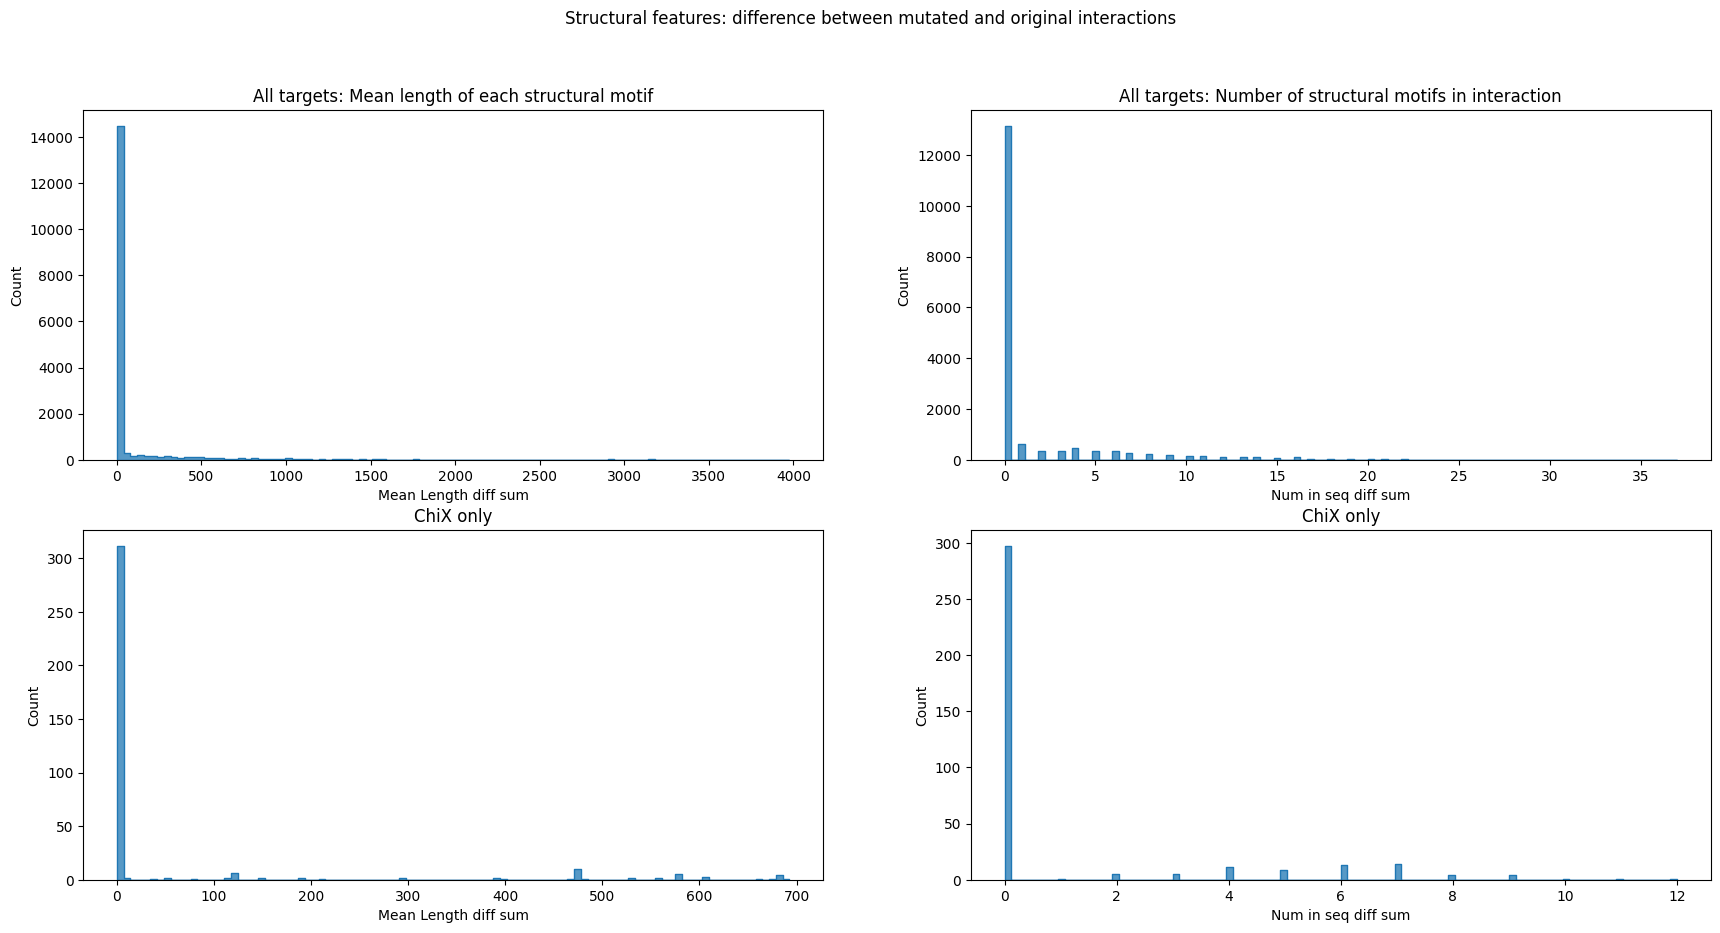

In [58]:
fig = plt.figure(figsize=(21, 10))

ax1 = plt.subplot(2,2,1)
sns.histplot(df_mutations, x='Mean Length diff sum', element='step', bins=100, log_scale=[False, False])
plt.title('All targets: Mean length of each structural motif')
ax2 = plt.subplot(2,2,2)
sns.histplot(df_mutations, x='Num in seq diff sum', element='step', bins=100, log_scale=[False, False])
plt.title('All targets: Number of structural motifs in interaction')
ax = plt.subplot(2,2,3)
sns.histplot(df_mutations[df_mutations['Interactor 2'].isin(chix['Interactor 2'].to_list())], x='Mean Length diff sum', element='step', bins=100, log_scale=[False, False])
plt.title('ChiX only')
# ax.set_ylim(ax1.get_ylim())
# ax.set_xlim(ax1.get_xlim())
ax = plt.subplot(2,2,4)
sns.histplot(df_mutations[df_mutations['Interactor 2'].isin(chix['Interactor 2'].to_list())], x='Num in seq diff sum', element='step', bins=100, log_scale=[False, False])
plt.title('ChiX only')
# ax.set_ylim(ax2.get_ylim())
# ax.set_xlim(ax2.get_xlim())

plt.suptitle('Structural features: difference between mutated and original interactions')

### ChiX binding EGFP and cyRFP1

In [195]:
chix

,Interactor 1,Interactor 2,ID 1,ID 2,Category 1,Category 2,Regulation,Binding position 1,Binding position 2,Sequence 1,Sequence 2,Source DB
279,chiX,rpoS,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:947210",NaN,mRNA,No Interaction,['NA'],['NA'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGAGTCAGAATACGCTGAAAGTTCATGATTTAAATGAAGATGCGG...,sRNATarBase
353,chiX,citA,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:945233",trans-encoded antisense RNA,mRNA,Repression,['46..57'],['-37..-26'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGTTGCAGCTTAACGAGAATAAACAGTTTGCATTTTTCCAAAGAC...,sRNATarBase
374,chiX,chiP,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:945296",trans-encoded antisense RNA,mRNA,Repression,['81..92'],['45..56'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGCGTACGTTTAGTGGCAAACGTAGTACGCTGGCGCTGGCTATCG...,sRNATarBase
408,chiX,chbC,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:945982",trans-encoded antisense RNA,mRNA,Repression,['NA'],['NA'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGAGTAATGTTATTGCATCGCTTGAAAAGGTACTCCTCCCTTTTG...,sRNATarBase
0,chiX,EGFP,"chromosome:NC_000913.3, Gene ID:5061500",https://www.addgene.org/54762/,trans-encoded antisense RNA,mRNA,Repression,['NA'],['NA'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCC...,Addgene
0,chiX,cyRFP1,"chromosome:NC_000913.3, Gene ID:5061500",https://www.addgene.org/84356/,trans-encoded antisense RNA,mRNA,Activator,['NA'],['NA'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGGTGAGCAAGGGCGAGGAGCTGATCAAGGAGAACATGAGAAGCA...,Addgene


# Ranking of mutants

In [30]:
sim_data_l['Syn_ChiX_20-D']['acnA']

{'id1': 'acnA',
 'id2': 'Syn_ChiX_20-D',
 'E': '-11.59',
 'E_norm': '-0.934456',
 'bpList': '(2198,59):(2199,58):(2200,57):(2201,56):(2203,55):(2204,54):(2205,53):(2206,52):(2207,51):(2208,50):(2209,49):(2210,48):(2211,47)',
 'hybridDPfull': '.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [74]:
for c in ['seedPu1', 'seedPu2', 'seedStart1', 'seedStart2', 'seedEnd1', 'seedEnd2']:
    df_mutations[c + '_'] = list(map(lambda x: np.array([float(xx) for xx in x]) if x[0] else np.array([]), df_mutations[c].str.split(':')))
    
    
df_mutations['weighted_seedPu1'] = list(map(lambda a, s, e: np.mean(a * (e - s) / (np.sum(np.abs(e - s)))), df_mutations['seedPu1' + 'uh'], df_mutations['seedStart1' + 'uh'], df_mutations['seedEnd1' + 'uh']))
df_mutations['weighted_seedPu2'] = list(map(lambda a, s, e: np.mean(a * (e - s) / (np.sum(np.abs(e - s)))), df_mutations['seedPu2' + 'uh'], df_mutations['seedStart2' + 'uh'], df_mutations['seedEnd2' + 'uh']))

/home/wadh6511/Kode/env_evo/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wadh6511/Kode/env_evo/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [87]:
df_mutations['E'] = df_mutations['E'].apply(float)

In [178]:
from typing import List


def score_similarity(target, og_val):
    return target - og_val


def rna_objective(data: pd.DataFrame, ref: str,
                  stronger: List[str], same: List[str], weaker: List[str],
                  e_weight: float = 1.0, a_weight: float = 1.0, s_weight: float = 1.0):
    """ The binding energy, the accessibility of the seed region, and the structural changes are the key parameters that we can use to optimise for new RNAs.
    The data variable should have a column for the source RNA and for the target RNA, and the mutations should be in the source RNA column. """

    source_col = 'Interactor 1'
    target_col = 'Interactor 2'
    data['score_energy'] = 0
    data['score_access'] = 0
    data['score_struct'] = 0
    data['score'] = 0

    for t in data[target_col].unique():

        param = 'E'
        e_score = score_similarity(
            target=data[data[target_col] == t][param].to_numpy(), og_val=data[(data[source_col] == ref) & (data[target_col] == t)][param].to_numpy())
        param = 'weighted_seedPu1'
        a_score = score_similarity(
            target=data[data[target_col] == t][param].to_numpy(), og_val=data[(data[source_col] == ref) & (data[target_col] == t)][param].to_numpy())
        param = 'Num in seq diff sum'
        s_score = score_similarity(
            target=data[data[target_col] == t][param].to_numpy(), og_val=data[(data[source_col] == ref) & (data[target_col] == t)][param].to_numpy())

        if t in stronger:

            data.loc[data[target_col] == t, 'score_energy'] = -1 * e_score
            data.loc[data[target_col] == t, 'score_access'] = a_score

        elif t in weaker:
            data.loc[data[target_col] == t, 'score_energy'] = e_score
            data.loc[data[target_col] == t, 'score_access'] = -1 * a_score

        elif t in same:
            data.loc[data[target_col] == t, 'score_energy'] = -1 * np.abs(e_score)
            data.loc[data[target_col] == t, 'score_access'] = -1 * np.abs(a_score)

        data.loc[data[target_col] == t, 'score_struct'] = -1 * np.abs(s_score)

    for s in ['score_energy', 'score_access', 'score_struct']:
        data[s] = np.interp(data[s].to_numpy(), [data[s].min(), 0, data[s].max()], [-1, 0, 1])
    data['score'] = (
        a_weight * data['score_access']
        ) + (e_weight * data['score_energy']
             ) + (s_weight * data['score_struct'])
    data['score'] = np.interp(data['score'].to_numpy(), [data['score'].min(), 0, data['score'].max()], [-1, 0, 1])

    return data


stronger = ['EGFP', 'cyRFP1']
same = [i for i in chix['Interactor 2'].to_list() if i not in stronger]
weaker = [i for i in data['Interactor 2'].unique() if (i not in same)
          and (i not in stronger)]
df_mutations = rna_objective(
    df_mutations, ref='Syn_ChiX_20-D', stronger=stronger, same=same, weaker=weaker,
    s_weight=0)

Text(0.5, 1.0, 'Structure score')

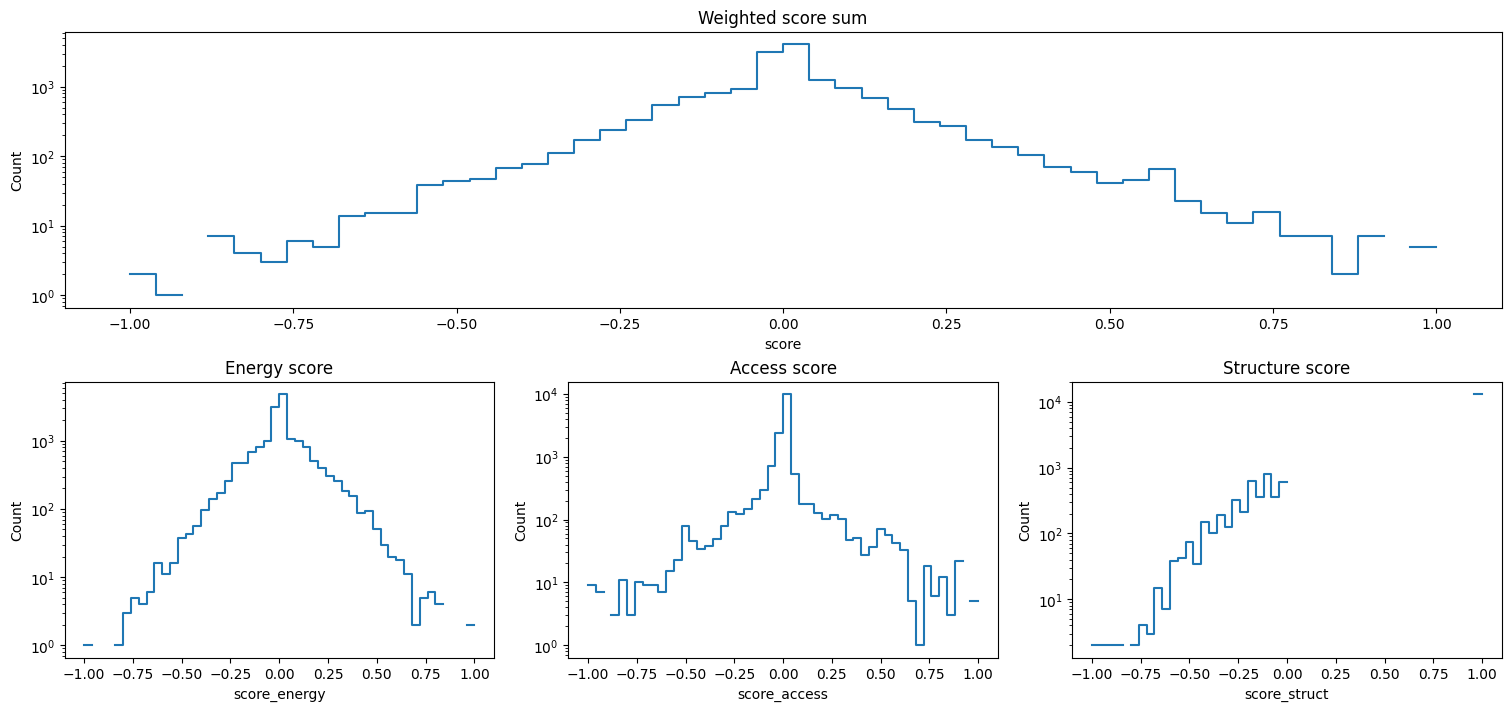

In [179]:
fig = plt.figure(figsize=(15, 7), layout="constrained")
gs = fig.add_gridspec(2, 3)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
sns.histplot(df_mutations, x='score', bins=50, log_scale=[False, True], element='step', fill=False, ax=ax1)
sns.histplot(df_mutations, x='score_energy', bins=50, log_scale=[False, True], element='step', fill=False, ax=ax2)
sns.histplot(df_mutations, x='score_access', bins=50, log_scale=[False, True], element='step', fill=False, ax=ax3)
sns.histplot(df_mutations, x='score_struct', bins=50, log_scale=[False, True], element='step', fill=False, ax=ax4)
ax1.set_title('Weighted score sum')
ax2.set_title('Energy score')
ax3.set_title('Access score')
ax4.set_title('Structure score')


In [181]:
for s in ['score_energy', 'score_access', 'score_struct']:
    df_mutations[s + '_pos'] = df_mutations[s] > 0

In [186]:
df_agg = df_mutations.groupby(by=['Interactor 1']).agg({s: 'mean' for s in ['score', 'score_energy', 'score_access', 'score_struct']})
for s in ['score_energy', 'score_access', 'score_struct']:
    df_agg[s + '_pos'] = df_agg[s] > 0
    df_agg[s + '_pos']
df_agg.sort_values(by=['score_energy' + '_pos', 'score_access' + '_pos', 'score'], ascending=False).to_csv('sorted_mutations.csv')
df_agg.sort_values(by=['score_energy' + '_pos', 'score_access' + '_pos', 'score'], ascending=False)

,score,score_energy,score_access,score_struct,score_energy_pos,score_access_pos,score_struct_pos
Interactor 1,,,,,,,
MutagenesisVariant_4,0.043029,0.042485,0.012740,0.744055,True,True,True
MutagenesisVariant_3,0.042066,0.024308,0.028306,0.603572,True,True,True
MutagenesisVariant_10,0.028813,0.028666,0.011187,0.686754,True,True,True
MutagenesisVariant_13,0.027561,0.034342,0.003565,0.676442,True,True,True
MutagenesisVariant_12,0.027424,0.014915,0.019059,0.585394,True,True,True
...,...,...,...,...,...,...,...
MutagenesisVariant_36,-0.087419,-0.113285,0.013976,0.673184,False,True,True
Syn_ChiX_20-D,0.000000,0.000000,0.000000,1.000000,False,False,True
MutagenesisVariant_20,-0.009477,-0.002734,-0.011598,0.675964,False,False,True
